In [42]:
%matplotlib inline
import netCDF4 
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

Location: Golfo de Penas (chilean Patagonia).

Geo-cordinates (image subset):
- NLb = -44.531
- WLb = -75.854
- SLb = -47.584
- ELb = -74.462

**DATE: 2022/01/26**


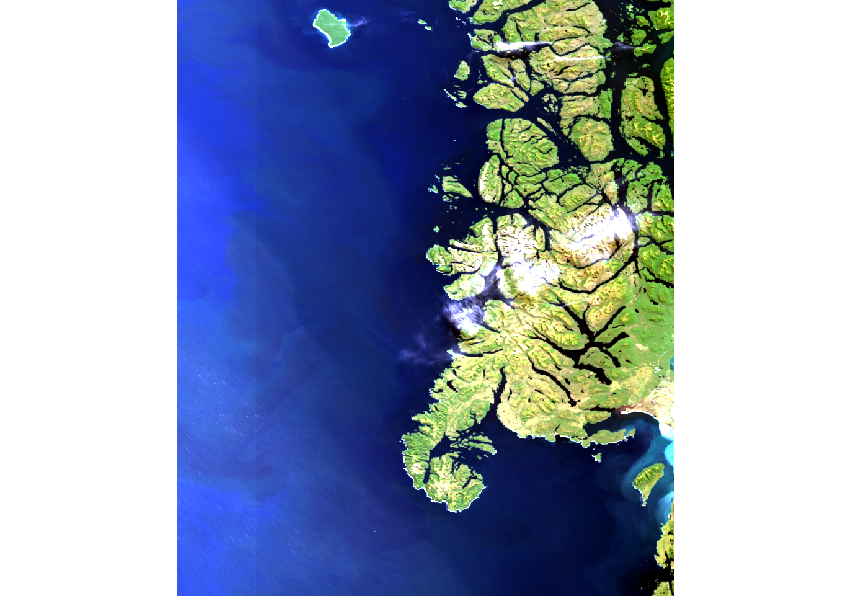

In [43]:
# Xarray dataset from SNAP (Sentinel Application Plataform) C2RCC Processor
file = 'subset_penas20220126T135830_C2RCC.nc'
ds = xr.open_dataset(file)
print('data size:',ds.nbytes/1e6, 'MB')
ds

data size: 138.55698 MB


<xarray.Dataset>
Dimensions:                                            (y: 961, x: 801)
Coordinates:
    lat                                                (y, x) float64 ...
    lon                                                (y, x) float64 ...
Dimensions without coordinates: y, x
Data variables: (12/41)
    conc_tsm                                           (y, x) float32 ...
    conc_chl                                           (y, x) float32 ...
    unc_tsm                                            (y, x) float32 ...
    unc_chl                                            (y, x) float32 ...
    TP_latitude                                        (y, x) float32 ...
    TP_longitude                                       (y, x) float32 ...
    ...                                                 ...
    horizontal_wind_vector_1                           (y, x) float32 ...
    horizontal_wind_vector_2                           (y, x) float32 ...
    humidity                                           (y, x) float32 ...
    sea_level_pressure                                 (y, x) float32 ...
    total_columnar_water_vapour                        (y, x) float32 ...
    total_ozone                                        (y, x) float32 ...
Attributes:
    Conventions:  CF-1.4
    TileSize:     481:267
    start_date:   26-JAN-2022 13:59:00.617093
    stop_date:    26-JAN-2022 13:59:42.866481

In [44]:
# Checking all variables
nc = netCDF4.Dataset(file, mode='r')
nc.variables.keys()

dict_keys(['conc_tsm', 'conc_chl', 'unc_tsm', 'unc_chl', 'TP_latitude', 'TP_longitude', 'OAA', 'OZA', 'SAA', 'SZA', 'atmospheric_temperature_profile_pressure_level_1', 'atmospheric_temperature_profile_pressure_level_2', 'atmospheric_temperature_profile_pressure_level_3', 'atmospheric_temperature_profile_pressure_level_4', 'atmospheric_temperature_profile_pressure_level_5', 'atmospheric_temperature_profile_pressure_level_6', 'atmospheric_temperature_profile_pressure_level_7', 'atmospheric_temperature_profile_pressure_level_8', 'atmospheric_temperature_profile_pressure_level_9', 'atmospheric_temperature_profile_pressure_level_10', 'atmospheric_temperature_profile_pressure_level_11', 'atmospheric_temperature_profile_pressure_level_12', 'atmospheric_temperature_profile_pressure_level_13', 'atmospheric_temperature_profile_pressure_level_14', 'atmospheric_temperature_profile_pressure_level_15', 'atmospheric_temperature_profile_pressure_level_16', 'atmospheric_temperature_profile_pressure_lev

In [45]:
# Variables of interest
con_chl = nc.variables['conc_chl']
con_tsm = nc.variables['conc_tsm']

In [46]:
chl = np.array(con_chl)
tsm = np.array(con_tsm)

In [47]:
# DataFrame with chl and tsm values 
df = pd.DataFrame(data={'chl' : chl.flatten(), 'tsm' : tsm.flatten()})

In [48]:
df.describe()

,chl,tsm
count,769761.000000,769761.000000
mean,1.650423,2.179686
std,2.537887,14.342299
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.510084,0.923966
75%,2.300989,1.510597
max,87.909760,319.509155


In [37]:
# uncertainty or error of chl and tsm values
u_chl = nc.variables['unc_chl']
u_tsm = nc.variables['unc_tsm']

In [38]:
chl_unc = np.array(u_chl)
tsm_unc = np.array(u_tsm)

In [39]:
# Dataframe
df_u = pd.DataFrame(data={'chl_unc' : chl_unc.flatten(), 'tsm_unc' : tsm_unc.flatten()})

In [40]:
df_u.describe()

,chl_unc,tsm_unc
count,769761.000000,769761.000000
mean,0.202476,0.300124
std,0.569852,2.332387
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.153920,0.086082
75%,0.226070,0.155312
max,36.000748,89.652122


### Chlorophyll a

(array([[961.,   0.,   0., ...,   0.,   0.,   0.],
        [961.,   0.,   0., ...,   0.,   0.,   0.],
        [961.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [960.,   1.,   0., ...,   0.,   0.,   0.],
        [961.,   0.,   0., ...,   0.,   0.,   0.],
        [961.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([ 0.      ,  8.790976, 17.581951, 26.372929, 35.163902, 43.95488 ,
        52.745857, 61.53683 , 70.327805, 79.11878 , 87.90976 ],
       dtype=float32),
 <a list of 801 BarContainer objects>)

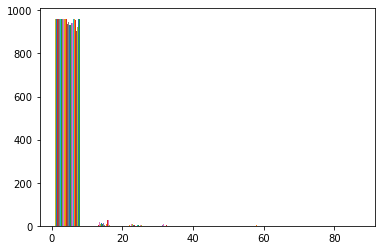

In [12]:
# quick view of values distribution
plt.hist(chl)

In [13]:
# chl concentration under 5 mg m-3
chl_values = df.chl[df["chl"]<=5.00]

In [14]:
chl_values.describe()

count    755068.000000
mean          1.409242
std           1.151873
min           0.000000
25%           0.000000
50%           1.485282
75%           2.240273
max           4.998534
Name: chl, dtype: float64

In [17]:
# chl concentration over 5 mg m-3
chl_high_values = df.chl[df["chl"]>=5.00]

In [18]:
chl_high_values.describe()

count    14693.000000
mean        14.044504
std         10.659320
min          5.000741
25%          6.682281
50%          9.118638
75%         19.361052
max         87.909760
Name: chl, dtype: float64

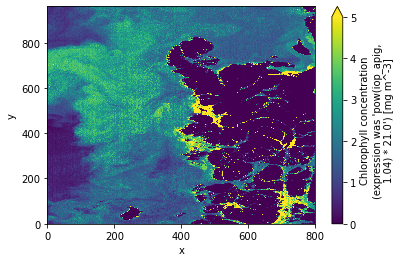

In [19]:
# Chlorophyll a map with matplotlib
ds.conc_chl.plot(vmin = 0, vmax = 5)

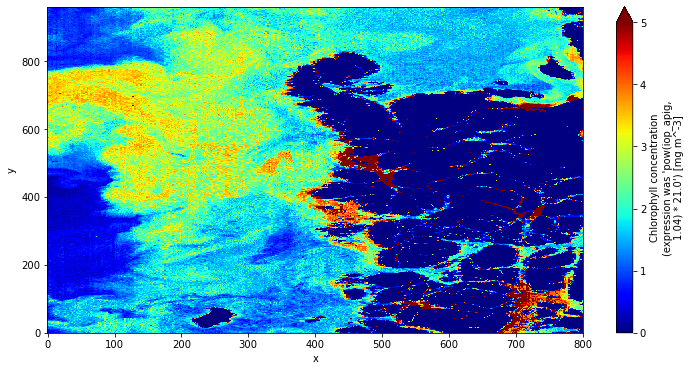

In [20]:
# another map
fig,ax=plt.subplots(figsize=(12,6))
ds.conc_chl.plot(vmin=0, vmax=5, cmap='jet',ax=ax)

#### SNAP chlorophyll a concentration

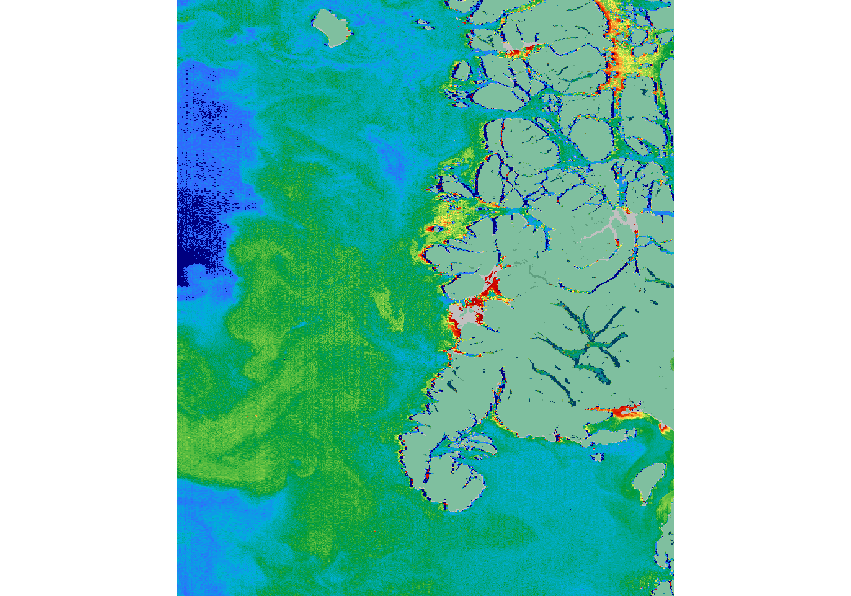

C:\Users\smart\Anaconda3\envs\mlpycaret\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


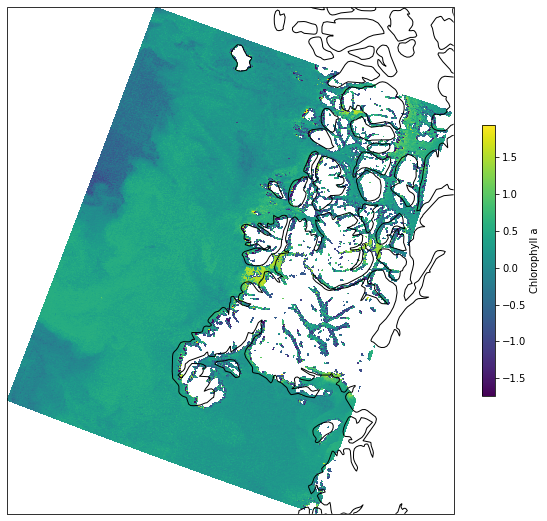

In [38]:
#Log10 scale of chlorophyll a map

import rasterio
import cartopy.crs as ccrs
proj = ccrs.Mercator()
data_crs = ccrs.PlateCarree()

plt.figure( figsize=(10,10))
ax = plt.axes(projection=proj)


# defining the variables to plot
## log transformation
conc_chl = np.log10(ds.conc_chl)
lat = ds.lat
lon = ds.lon

plt.pcolor(lon, lat, conc_chl, transform = data_crs)

plt.colorbar(label = 'Chlorophyll a', shrink=0.5)

ax.coastlines('10m')

plt.show()

### TSM (Total Suspended Matter)

(array([[961.,   0.,   0., ...,   0.,   0.,   0.],
        [961.,   0.,   0., ...,   0.,   0.,   0.],
        [961.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [951.,   2.,   0., ...,   2.,   0.,   0.],
        [955.,   2.,   0., ...,   2.,   0.,   0.],
        [950.,   2.,   0., ...,   4.,   0.,   0.]]),
 array([  0.      ,  31.950916,  63.901833,  95.852745, 127.803665,
        159.75458 , 191.70549 , 223.6564  , 255.60733 , 287.55823 ,
        319.50916 ], dtype=float32),
 <a list of 801 BarContainer objects>)

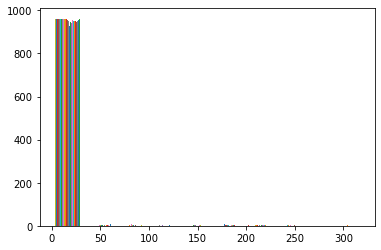

In [21]:
# quick view of values distribution
plt.hist(tsm)

In [22]:
# tsm concentration under 20 g m-3
tsm_values = df.tsm[df["tsm"]<=20.00]

In [23]:
tsm_values.describe()

count    762548.000000
mean          0.980164
std           1.232131
min           0.000000
25%           0.000000
50%           0.910795
75%           1.494086
max          19.993979
Name: tsm, dtype: float64

In [24]:
# tsm concentration over 20 g m-3
tsm_high_values = df.tsm[df["tsm"]>=20.00]

In [25]:
tsm_high_values.describe()

count    7213.000000
mean      129.001266
std        74.648109
min        20.010811
25%        54.855381
50%       129.986374
75%       199.908905
max       319.509155
Name: tsm, dtype: float64

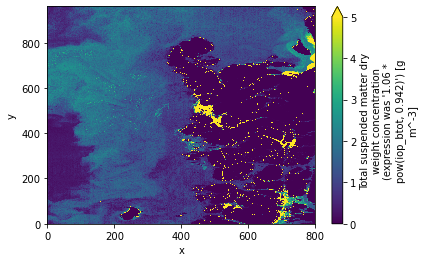

In [49]:
# TSM map with matplotlib
ds.conc_tsm.plot(vmin = 0, vmax = 5)

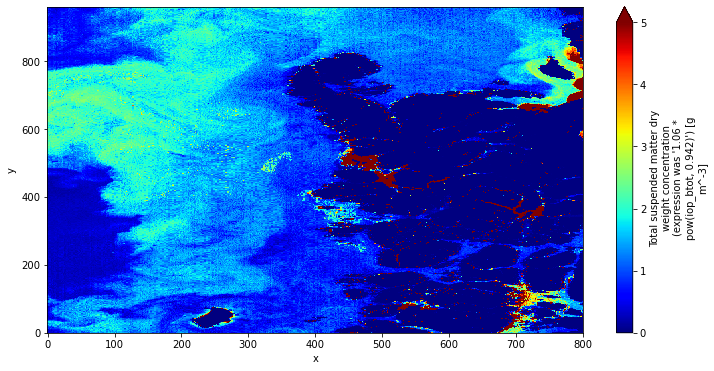

In [50]:
fig,ax=plt.subplots(figsize=(12,6))
ds.conc_tsm.plot(vmin=0, vmax=5, cmap='jet',ax=ax)

#### SNAP Picture TSM concentration

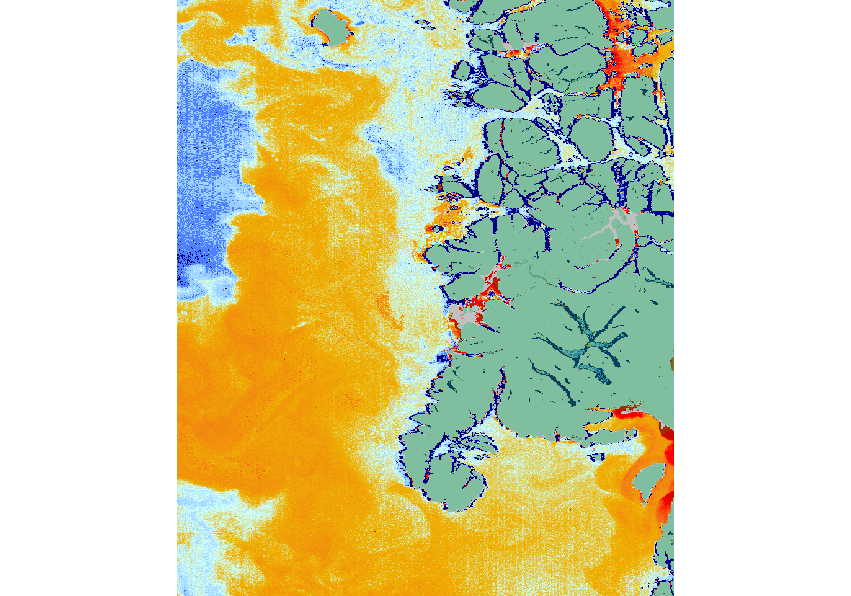